### NLTK Inaugural

In [2]:
# nltk -> specific
# 구구단할때 참조 
import nltk
nltk.download() # lookup error

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> ㅂ
Command 'ㅂ' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [1]:
import nltk
nltk.download('brown', 'inaugural')
brown = nltk.corpus.brown

[nltk_data] Downloading package brown to inaugural...
[nltk_data]   Unzipping corpora/brown.zip.


In [6]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [7]:
from nltk.inference.tableau import Categories
#cfd
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


In [14]:
# modals의 빈도수가 포함된 cfd (word -> modal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can','could','would','will', 'might', 'may']
    
    for word in brown.words(categories=genre)
      if word.lower() == modal # 탭을 하지 않아도 실행됨
 )
cfd1.tabulate()
#lower()하는 것이 더 정확

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


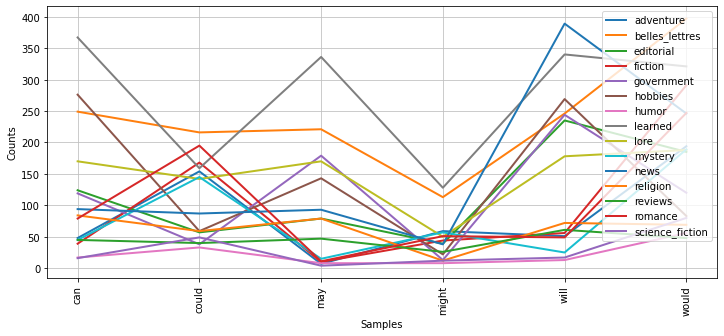

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
cfd1.plot()

#### Inaugural
- 연설문 코퍼스

In [16]:
import nltk
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [18]:
inaugural = nltk.corpus.inaugural

In [ ]:
inaugural.fileids() # 연도 - 이름.txt | '2021-Biden.txt'

In [28]:
# ['america', 'citizen'] 빈도수를 cfd로 만드시오.

cfd2 = nltk.ConditionalFreqDist(
    (file, words) #
    for file in inaugural.fileids()
    for words in ['america', 'citizen']

    for word in inaugural.words(fileids=file)
    if word.lower() == words
)
cfd2.tabulate()

                    america citizen 
1793-Washington.txt       1       0 
     1797-Adams.txt       5       1 
    1817-Monroe.txt       0       5 
    1821-Monroe.txt       2       0 
     1825-Adams.txt       0       1 
  1837-VanBuren.txt       1       1 
  1841-Harrison.txt       0      11 
    1853-Pierce.txt       0       1 
  1857-Buchanan.txt       1       0 
   1861-Lincoln.txt       0       1 
     1869-Grant.txt       0       2 
     1873-Grant.txt       0       1 
     1877-Hayes.txt       0       1 
  1881-Garfield.txt       1       2 
 1885-Cleveland.txt       0       5 
  1889-Harrison.txt       0       3 
 1893-Cleveland.txt       0       3 
      1909-Taft.txt       4       0 
    1917-Wilson.txt       2       0 
   1921-Harding.txt      15       0 
  1925-Coolidge.txt       8       2 
    1929-Hoover.txt       6       2 
 1937-Roosevelt.txt       1       1 
 1941-Roosevelt.txt       7       1 
 1945-Roosevelt.txt       1       0 
1953-Eisenhower.txt       3       3 
1

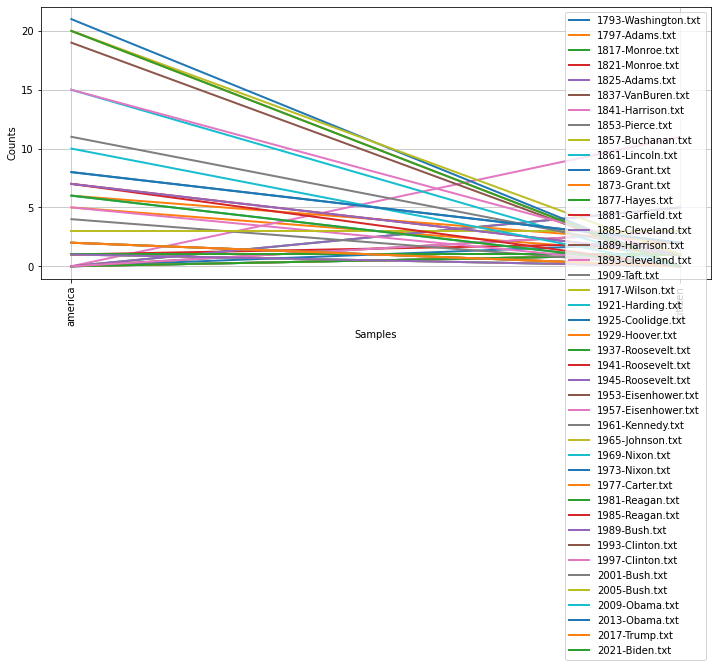

In [32]:
plt.figure(figsize=(12, 5))
cfd2.plot()

### Tuple & List
- 불변 객체 vs. 가변 객체

In [34]:
#1. 생성
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [35]:
#1. 1 요소 여러 개일 때
alphabetT = ('a', 'b')
alphabetT = 'a', 'b'
alphabetT

alphabetT = ['a', 'b']

In [36]:
#1.2 요소 1개일 때
alphaT = ('a') #str, 튜플 아님
type(alphaT)

str

In [37]:
alphabetT = ('b',)
type(alphaT)

str

In [38]:
alphaT = ('b',) #쉼표 필요
type(alphaT)

tuple

- unpacking: 한 변수에 여러 데이터를 할당하는 것
  - list, tuple 자체. a = [1,2,3,4] -> packing
- unpacking: 한 변수에 따라 여러 데이터가 들어있을때 여러 변수에 나누는 것
  - a = 'k', b = 'i', c = 'm' -> unpacking

In [39]:
a, b, c = 'kim' #unpacking #문자열일때 주의
a, b, c

('k', 'i', 'm')

In [40]:
# 값 교환하기
pwd = 'abcd'
userId = 'sky'

#pwd = userId -> 둘다 abcd가 돼서 sky 사라짐

"""
temp1 = uesrId
temp2 = pwd
pwd = temp1
userId = temp2
"""

pwd, userId = userId, pwd
pwd, userId

('sky', 'abcd')

In [41]:
# 연산 가능(list와 똑같음)

('a',) + (1, 2)

('a', 1, 2)

In [42]:
(1, 2) * 3

(1, 2, 1, 2, 1, 2)

In [43]:
# 튜플은 안변한다는데 왜 연산이 가능하냐?
x = ('a',)
y = (1, 2)
id(x), id(x+y) #x+y != x id값이 다름, 새로운 변수에 할당한 것

(140479410518032, 140479410625104)

In [44]:
#비교 가능
x = 1, 2
y = 1, 6

x < y #첫번째 인자부터 비교

True

In [45]:
#순회 가능
for i in x:
    print(x)

(1, 2)
(1, 2)


In [46]:
#리스트 컴프 사용 가능
[i for i in x] #-> 다만 이게 리스트로 바뀌는 것 뿐, 이게 제일 좋음

[1, 2]

In [47]:
#tuple comprehenion 없음, tuple로 변경은 가능
tuple([i for i in x]) #그 다음 이거
*[i for i in x], #그 다음 이거, 느림

(1, 2)

In [48]:
# 형변환 주의!
dog = 'dog'
dogT = tuple(dog)

In [49]:
#slicing 가능
dogT[0]

'd'

In [50]:
#중복가능
(1, 1, 1, 1)

(1, 1, 1, 1)

[정리]
- tuple 장점
  - 변하지 않는 데이터 시쿼스를 만들 수 있다. -> 타인의 접근을 막는다. 
    - blue = 1, white = 2, ...
  - 메모리 사용 적다.
- list 장점
  - 튜플의 장점 필요없을 때 전부 리스트 사용
  - 데이터를 순차적으로 파악할 때
  - 중복 데이터를 쓸 수 있다는 점 vs. set
  

### 리스트의 유용한 함수들
- 변경, 삭제, 추가
- 리스트컴프리헨션 업그레이드

In [51]:
list('abcd')

['a', 'b', 'c', 'd']

In [52]:
list(range(5))

[0, 1, 2, 3, 4]

In [53]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [54]:
# 추가
num.append(6) #값 반환 안됨, 함수 쓰는 것 자체가 추가, append(맨뒤에 요소 추가, 여러개 안됨, 하나만 가능)
num

[0, 1, 2, 3, 4, 6]

In [55]:
# insert(index, item)
num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 6]

In [56]:
# 여러 개 추가
x = [6, 6, 6]
num.extend(x) # 리스트를
num #계속 늘어남?

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6]

In [57]:
num.append(x) #리스트가 들어감, extend =/= append
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [58]:
# extend = num += x
num += x
num #튜플은 안됨

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [59]:
num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [61]:
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [62]:
num[:3] = 'cat' #str 넣었을 때, 하나하나씩 unpacking 되어서 들어감
num

['c', 'a', 't', 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [63]:
# 삭제
del num[:3]
num

[2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [64]:
# remove(value)
num.remove(2)
num

[3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [65]:
num.pop()
num

[3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6]

In [66]:
num.pop(0)
num

[4, 6, 6, 6, 6, [6, 6, 6], 6, 6]

In [67]:
num.clear()
num

[]

In [68]:
num = list(range(5))
num.index(4)

4

In [69]:
sorted(num, reverse=True) #num 안변함

[4, 3, 2, 1, 0]

In [70]:
num

[0, 1, 2, 3, 4]

In [72]:
num.sort(reverse=True)
num

[4, 3, 2, 1, 0]

In [73]:
a = list(range(1, 5))
b = a
b[0] = 6
id(a), id(b)

(140479410166272, 140479410166272)

In [74]:
c = a.copy()
d = list(a)
e = a[:]

id(a), id(c), id(d), id(e)

(140479410166272, 140479410231328, 140479410293968, 140479410462304)

In [75]:
a.append([1, 2, 3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [76]:
f = a.copy()
id(a), id(f)

(140479410166272, 140479410291568)

In [77]:
f[-1][0] = 9
a, f

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

In [78]:
import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [79]:
g[-1][0] = 10
a, g

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [83]:
# 순회: zip, enumerate
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

# (name, age)
for item1, item2 in zip(name, age):
    print((item1, item2))

('kate', 77)
('royce', 44)
('phill', 54)


In [84]:
#중첩 for문이랑은 다름
for item1 in name:
    for item2 in age:
        print((item1, item2)) #> 괄호 두번, 안에를 튜플로 바꾼것

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [85]:
for item1 in name:
    for item2 in age:
        print((item1, item2)) 

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [87]:
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [88]:
for idx, item in enumerate(name):
    print(idx, item)

0 kate
1 royce
2 phill


In [89]:
[word for word in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [90]:
[(i, j+33) for i, j in zip(name, age)] #변화를 주고 싶을때는 두개로

[('kate', 110), ('royce', 77), ('phill', 87)]

In [91]:
n_l = []
for i, j in zip(name, age):
    n_l.append((i,j)) #append 사용
n_l

[('kate', 77), ('royce', 44), ('phill', 54)]

In [94]:
for i in name:
    empty = []
    for j in age:
        print(i, j)
        empty.append((i, j))

kate 77
kate 44
kate 54
royce 77
royce 44
royce 54
phill 77
phill 44
phill 54


In [95]:
[[i, j] for i in name for j in age]


[['kate', 77],
 ['kate', 44],
 ['kate', 54],
 ['royce', 77],
 ['royce', 44],
 ['royce', 54],
 ['phill', 77],
 ['phill', 44],
 ['phill', 54]]

In [96]:
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

empty = []
for i in name:
    for j in age:
        print(i, j)
        empty.append((i, j))
        
empty

kate 77
kate 44
kate 54
royce 77
royce 44
royce 54
phill 77
phill 44
phill 54


[('kate', 77),
 ('kate', 44),
 ('kate', 54),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('phill', 77),
 ('phill', 44),
 ('phill', 54)]

In [97]:
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]


for i in name:
    for j in age:
        empty = []
        print(i, j)
        empty.append((i, j))
    #output.append(empty)

kate 77
kate 44
kate 54
royce 77
royce 44
royce 54
phill 77
phill 44
phill 54


In [98]:
[[(i, j) for i in name] for j in age]

[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]

In [99]:
sentence = 'do not judge a book by its cover'

In [100]:
sentence.split()

['do', 'not', 'judge', 'a', 'book', 'by', 'its', 'cover']

In [101]:
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [102]:
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

#1. 문장마다 스트링으로 변환해서 리스트로 변환
# ['문장1', '문장2']

In [103]:
#[[word for word in text.split()]]

[" ".join(word) for word in text]

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [104]:
#2. 전체를 스트링으로 변환
#'문장1 문장2'
' '.join([" ".join(word) for word in text])

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [105]:
[word for sent in text for word in sent]

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

In [106]:
for sent in text:
    for word in sent:
        print(word)

Sunja
said
goodnight
to
her
mother
Hansu
was
no
longer
in
Busan


In [107]:
#리.컴 if 사용시 else는??
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#짝수면 가져오고, 홀수면 = '홀수'로
[i for i in range(10) if i%2 == 0 else '홀수']

In [109]:
[i if i%2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

과제 : brown 정제하기

In [112]:
import nltk
nltk.download('brown')
brown = nltk.corpus.brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [113]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
brown.raw(categories='romance')[:5000]
#[['They', 'neither', 'liked', ...], []] 
#문장 분절 -> 단어 분절
"""
    - 문장부호, POS 제거
    - 's, 'nt도 여력이 된다면 건드려보기 (she's -> she, 's) (don't -> do, 'nt)
    - 'fly-dotted' -> fly, dotted

'품사제거 They/ppss (ppss 삭제)'